In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\PML datasets\weather_data_missing_data.csv")
df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


### Replacing single value

In [3]:
# Replacing with NaN
new_df = df.replace("-99999", value=np.NAN)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


In [4]:
# To find null values in any column
new_df[new_df.isna().any(axis=1)]

,day,temperature,windspeed,event
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain


In [5]:
# To find all rows with null values in particular column
new_df[new_df['temperature'].isna()]

,day,temperature,windspeed,event
1,01-02-2017,NaN,7,Sunny
3,01-04-2017,NaN,7,0


### Replacing multiple values with NaN

In [6]:
new_df = df.replace(to_replace=["-99999", "-88888"], value=np.NaN)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


### Replacing per column

In [7]:
new_df = df.replace({'temperature':'-99999', 'windspeed':"-99999", 'event':'0'}, np.NaN)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,NaN
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,NaN
7,01-06-2017,34 F,5,NaN
8,01-06-2017,34 C,20mph,NaN
9,01-06-2017,34,20mph,NaN


### Replacing by using mapping

In [8]:
new_df = df.replace({"-99999":np.NaN, "0":"Sunny"})
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,Sunny
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,Sunny
7,01-06-2017,34 F,5,Sunny
8,01-06-2017,34 C,20mph,Sunny
9,01-06-2017,34,20mph,Sunny


### Using Regex

In [9]:
# Replacing alphabets like (20mph, 34 F) with ''
new_df = df.replace({'temperature':'[A-Za-z]', 'windspeed':'[A-Za-z]'}, '', regex=True)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34,5,0
8,01-06-2017,34,20,0
9,01-06-2017,34,20,0


### Replacing list with another list

In [10]:
df = pd.DataFrame({'score':['good', 'bad', 'average', 'exceptional', 'very good', 'average', 'exceptional'],
                   'student':['Sam', 'Maya', 'Parth', 'Tom', 'Jerry', 'Rama', 'Rob']})
df

,score,student
0,good,Sam
1,bad,Maya
2,average,Parth
3,exceptional,Tom
4,very good,Jerry
5,average,Rama
6,exceptional,Rob


In [11]:
new_df = df.replace(['good', 'bad', 'average', 'exceptional', 'very good'], [3,5,4,1,2])
new_df

,score,student
0,3,Sam
1,5,Maya
2,4,Parth
3,1,Tom
4,2,Jerry
5,4,Rama
6,1,Rob


In [12]:
# To get distinct values
print(df['score'].unique())
# To get distinct count
print(df['score'].nunique())

['good' 'bad' 'average' 'exceptional' 'very good']
5


## Pie chart

average        2
exceptional    2
good           1
bad            1
very good      1
Name: score, dtype: int64
7


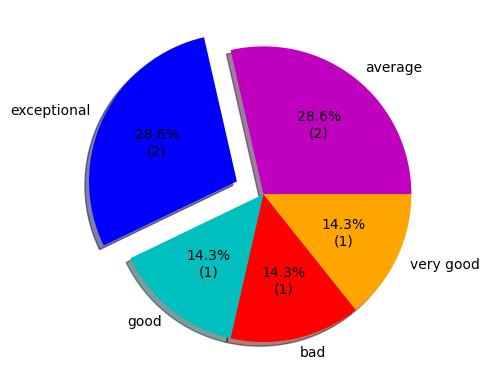

In [13]:
def func(percentage, all_values):
    absolute = int(percentage/100.*s)
    return "{0:.1f}%\n({1:d})".format(percentage, absolute)    # 2/10 *100

print(df['score'].value_counts())

df1 = df['score'].value_counts()

s=np.sum(df1.values)
print(s)

plt.pie(df1.values, labels=df1.index, autopct=lambda percentage: func(percentage, df1.values), colors=['m','b', 'c', 'r', 'orange'], explode=(0,0.2,0,0,0), shadow=True)
plt.show()

### Adding new column

In [14]:
# Adding two Strings
new_df['email'] = df['student'] + '@myCompany.com'
new_df

,score,student,email
0,3,Sam,Sam@myCompany.com
1,5,Maya,Maya@myCompany.com
2,4,Parth,Parth@myCompany.com
3,1,Tom,Tom@myCompany.com
4,2,Jerry,Jerry@myCompany.com
5,4,Rama,Rama@myCompany.com
6,1,Rob,Rob@myCompany.com


In [15]:
# Display student with score greater than 2
new_df[new_df['score']>2]

,score,student,email
0,3,Sam,Sam@myCompany.com
1,5,Maya,Maya@myCompany.com
2,4,Parth,Parth@myCompany.com
5,4,Rama,Rama@myCompany.com


In [16]:
# Multiple conditions
new_df[(new_df['score']>2) & (df['student']=="Maya")]

,score,student,email
1,5,Maya,Maya@myCompany.com


In [17]:
df = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\PML datasets\weather_data_missing_data.csv")
df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


### Drop rows with NaN value

In [18]:
# Thresh=2 requires minimum 2 Non-Null values
new_df = df.dropna(thresh=2)
new_df

# Drops all rows with null values in it
#new_df = df.dropna()
#new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0
